Análisis teniendo en cuenta las ventanas

In [1]:
%cd ~/work/nbs_pipeline

/home/macu/work/nbs_pipeline


In [2]:
import pandas as pd
import numpy as np
import ydata_profiling as ydp
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [3]:
#file_errors_small  = 'errors_small_03022025_2.csv'
#file_results_small = 'results_small_03022025_2.csv'
#file_errors_small  = 'errors_small_04022025_1.csv'
#file_results_small = 'results_small_04022025_1.csv'
#file_errors_small  = 'errors_small_06022025_1.csv'
#file_results_small = 'results_small_06022025_1.csv'
#file_errors_small  = 'errors_small_07022025_1.csv'
#file_results_small = 'results_small_07022025_1.csv'
file_errors_small  = 'errors_window_mix.csv'
file_results_small = 'results_window_mix.csv'
#file_errors_small  = 'errors_small_10022025_2.csv'
#file_results_small = 'results_small_10022025_2.csv'
file_errors_small  = 'errors_small_11022025_1.csv'
file_results_small = 'results_small_11022025_1.csv'

In [4]:
results_small = pd.read_csv(file_results_small, index_col=None, header=0)
errors_small  = pd.read_csv(file_errors_small, index_col=None, header=0)

In [5]:
! tail 'errors_small_04022025_1.csv'

model_size,n_epochs,dataset_percent,masked_percent,n_windows,windows,error


In [6]:
print("----- ERRORS -----")
print(f"Total error cases: {len(errors_small)}")
display(errors_small.head())
print(f"Total results: {len(results_small)}")
display(results_small.tail())

----- ERRORS -----
Total error cases: 0


,model_size,n_epochs,dataset_percent,masked_percent,n_windows,windows,error


Total results: 132


,model_size,n_epochs,dataset_percent,masked_percent,n_windows,time,first_train_loss,first_mse,first_rmse,first_mae,...,last_mae,last_smape,windows,best_epochs,train_losses,eval_pre,eval_post,full_result,first_eval_loss,last_eval_loss
127,small,10,0.3,0.25,2,80.034489,0.006964,0.084791,0.007327,0.050911,...,0.050784,0.156883,[12],[3],"[0.006964422836063022, 0.0006789722694975353, ...","{'loss': [0.006964422836063022], 'mse': [0.084...","{'loss': [0.006931444604560966], 'mse': [0.084...","([[0.006964422836063022, 0.0006789722694975353...",0.006964,0.006931
128,small,10,0.3,0.25,4,80.130187,0.006964,0.084791,0.007327,0.050911,...,0.050784,0.156883,[12],[3],"[0.006964422836063022, 0.0006789722694975353, ...","{'loss': [0.006964422836063022], 'mse': [0.084...","{'loss': [0.006931444604560966], 'mse': [0.084...","([[0.006964422836063022, 0.0006789722694975353...",0.006964,0.006931
129,small,10,0.3,0.25,6,79.993188,0.006964,0.084791,0.007327,0.050911,...,0.050784,0.156883,[12],[3],"[0.006964422836063022, 0.0006789722694975353, ...","{'loss': [0.006964422836063022], 'mse': [0.084...","{'loss': [0.006931444604560966], 'mse': [0.084...","([[0.006964422836063022, 0.0006789722694975353...",0.006964,0.006931
130,small,10,0.3,0.25,8,79.274997,0.006964,0.084791,0.007327,0.050911,...,0.050784,0.156883,[12],[3],"[0.006964422836063022, 0.0006789722694975353, ...","{'loss': [0.006964422836063022], 'mse': [0.084...","{'loss': [0.006931444604560966], 'mse': [0.084...","([[0.006964422836063022, 0.0006789722694975353...",0.006964,0.006931
131,small,10,0.3,0.25,10,79.528171,0.006964,0.084791,0.007327,0.050911,...,0.050784,0.156883,[12],[3],"[0.006964422836063022, 0.0006789722694975353, ...","{'loss': [0.006964422836063022], 'mse': [0.084...","{'loss': [0.006931444604560966], 'mse': [0.084...","([[0.006964422836063022, 0.0006789722694975353...",0.006964,0.006931


In [7]:
results_small['windows']=results_small['windows'].apply(lambda x: list(set(x)))

In [8]:
check = results_small[['eval_pre', 'eval_post']].copy()
check['loss_pre'] = check['eval_pre'].apply(lambda x: ast.literal_eval(x)['loss'][0])
check['loss_post'] = check['eval_post'].apply(lambda x: ast.literal_eval(x)['loss'][0])
check['pre_less_than_post'] = check['loss_pre'] > check['loss_post']


check_filtered = check[check['loss_post'] > check['loss_pre']].copy()

# Calcular diferencia absoluta y porcentaje
check_filtered['absolute_difference'] = check_filtered['loss_pre'] - check_filtered['loss_post']
check_filtered['percentage_difference'] = (check_filtered['absolute_difference'] / check_filtered['loss_pre']) * 100

# Mostrar las filas problemáticas
display(check_filtered[:3])

# Resumen estadístico
summary = {
    "total_cases": len(check_filtered),
    "mean_absolute_difference": check_filtered['absolute_difference'].mean(),
    "mean_percentage_difference": check_filtered['percentage_difference'].mean(),
    "max_absolute_difference": check_filtered['absolute_difference'].max(),
    "max_percentage_difference": check_filtered['percentage_difference'].max(),
    "min_absolute_difference": check_filtered['absolute_difference'].min(),
    "min_percentage_difference": check_filtered['percentage_difference'].min(),
}


,eval_pre,eval_post,loss_pre,loss_post,pre_less_than_post,absolute_difference,percentage_difference
0,"{'loss': [0.006948238079530711], 'mse': [0.084...","{'loss': [0.006948590010324551], 'mse': [0.084...",0.006948,0.006949,False,-3.519308e-07,-0.005065
90,"{'loss': [0.006964422836063022], 'mse': [0.084...","{'loss': [0.006967862558667548], 'mse': [0.084...",0.006964,0.006968,False,-3.439723e-06,-0.049390
91,"{'loss': [0.006964422836063022], 'mse': [0.084...","{'loss': [0.006967862558667548], 'mse': [0.084...",0.006964,0.006968,False,-3.439723e-06,-0.049390


In [9]:
import json

In [10]:
def safe_eval(x, key):
    # Si ya es un diccionario, devolverlo
    if isinstance(x, dict):
        return x
    
    # Si es una cadena que empieza y termina con { }, intentamos convertirla
    if isinstance(x, str) and x.startswith("{") and x.endswith("}"):
        # Reemplazamos:
        # - comillas simples por dobles, para formar un JSON válido
        # - 'nan' por 'null', en caso de que aparezca
        x_mod = x.replace("'", '"').replace("nan", "null")
        try:
            return json.loads(x_mod)[key]
        except json.JSONDecodeError as e:
            print("Error al parsear JSON:", x)
            print("Detalles del error:", e)
    
    # Si no es válido, devolver np.nan
    return np.nan

results_small["eval_pre"].apply(lambda x: safe_eval(x,'loss'))

0      [0.006948238079530711]
1      [0.006964422836063022]
2      [0.006964422836063022]
3      [0.006964422836063022]
4      [0.006964422836063022]
                ...          
127    [0.006964422836063022]
128    [0.006964422836063022]
129    [0.006964422836063022]
130    [0.006964422836063022]
131    [0.006964422836063022]
Name: eval_pre, Length: 132, dtype: object

In [11]:
eval_pre = results_small["eval_pre"].apply(lambda x: safe_eval(x,'loss'))
eval_post = results_small["eval_post"].apply(lambda x: safe_eval(x, 'loss'))

In [12]:
eval_pre[:3]

0    [0.006948238079530711]
1    [0.006964422836063022]
2    [0.006964422836063022]
Name: eval_pre, dtype: object

In [13]:
eval_post[:3]

0    [0.006948590010324551]
1    [0.006948590010324551]
2    [0.006948590010324551]
Name: eval_post, dtype: object

In [14]:
def improvement_percentage(pre, post):
    return [(pre_val-p)*100 / pre_val if pre_val != 0 else np.nan for pre_val, p in zip(pre, post)]

In [15]:
improvements = [improvement_percentage(pre, post) for pre, post in zip(eval_pre, eval_post)]

In [16]:
mean_improvements = [np.nanmean(np.array(x)) for x in improvements]

In [17]:
mean_improvements[:10]

[-0.005065036485684264,
 0.22733866267403824,
 0.22733866267403824,
 0.22733866267403824,
 0.22733866267403824,
 0.22733866267403824,
 0.28964540280199574,
 0.28964540280199574,
 0.28964540280199574,
 0.28964540280199574]

In [18]:
from copy import deepcopy

In [19]:
def aux(x):
    try:
        return ast.literal_eval(x)[0]
    except:
        return x[0]
results_small["best_epoch"] =  results_small["best_epochs"].apply(lambda x: aux(x))

In [20]:
results_small["best_epoch"]

0      0
1      0
2      0
3      0
4      0
      ..
127    3
128    3
129    3
130    3
131    3
Name: best_epoch, Length: 132, dtype: int64

In [21]:
profile_small_df = results_small[[
    "time", 
    "best_epoch", 
    "dataset_percent", 
    "masked_percent", 
    "n_windows", 
]].copy()
profile_small_df["improvement"] = deepcopy(mean_improvements)

In [22]:
def get_pos(x, pos, pos2 = None): 
    try:
        return x[pos][pos2]
    except:
        try:
            return x[pos]
        except:
            return x

In [23]:
def aux(x):
    try: 
        return get_pos(ast.literal_eval(x),-1)
    except:
        return get_pos(x,-1)
results_small["last_best_epoch"] = results_small["best_epochs"].apply(
    lambda x: aux(x)
)
results_small["last_best_epoch"][:3]

0    0
1    0
2    0
Name: last_best_epoch, dtype: int64

<Axes: title={'center': 'Improvement per case'}>

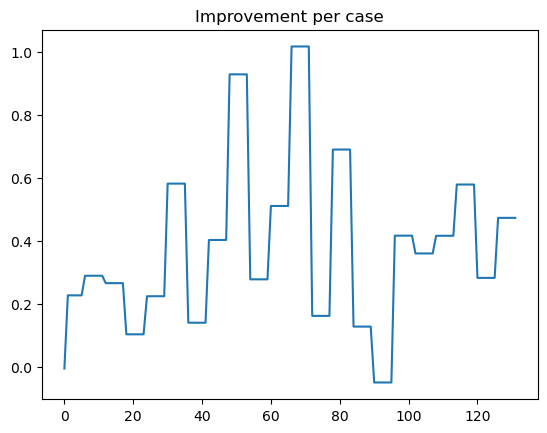

In [24]:
profile_small_df['improvement'].plot(title = "Improvement per case")

In [25]:
display(profile_small_df.sort_values('improvement', ascending = False)[:5])

,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
66,8.292023,0,0.3,0.75,1,1.017972
67,8.215678,0,0.3,0.75,2,1.017972
69,8.341554,0,0.3,0.75,6,1.017972
68,8.320687,0,0.3,0.75,4,1.017972
71,8.348331,0,0.3,0.75,10,1.017972


In [26]:
display(results_small.iloc[109])

model_size                                                      small
n_epochs                                                           10
dataset_percent                                                  0.25
masked_percent                                                   0.25
n_windows                                                           2
time                                                        64.894517
first_train_loss                                             0.006964
first_mse                                                    0.084791
first_rmse                                                   0.007327
first_mae                                                    0.050911
first_smape                                      [0.1574534930368639]
last_train_loss                                              0.000808
last_mse                                                     0.084626
last_rmse                                                    0.007296
last_mae            

In [27]:
profile_small_df[profile_small_df["time"] < 8 ].shape

(54, 6)

In [28]:
display(profile_small_df.sort_values('improvement', ascending = False))

,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
66,8.292023,0,0.3,0.75,1,1.017972
67,8.215678,0,0.3,0.75,2,1.017972
69,8.341554,0,0.3,0.75,6,1.017972
68,8.320687,0,0.3,0.75,4,1.017972
71,8.348331,0,0.3,0.75,10,1.017972
...,...,...,...,...,...,...
95,49.910597,7,0.2,0.25,10,-0.049390
91,50.514224,7,0.2,0.25,2,-0.049390
90,50.161342,7,0.2,0.25,1,-0.049390
92,49.875918,7,0.2,0.25,4,-0.049390


<Axes: >

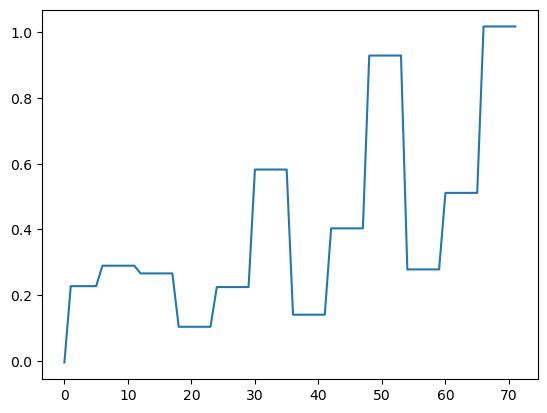

In [29]:
profile_small_df[profile_small_df["time"] < 10]["improvement"].plot()

In [30]:
print("--------------------- Train -----------------")
# Filtrar los 5 mejores loss_percents
display(profile_small_df.sort_values('improvement', ascending = False)[:5])
# Filtrar los 5 mejores loss_percent con dataset percent <= 0.25
display(profile_small_df[profile_small_df['dataset_percent'] < 0.50].sort_values('improvement', ascending = False)[:5])

--------------------- Train -----------------


,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
66,8.292023,0,0.3,0.75,1,1.017972
67,8.215678,0,0.3,0.75,2,1.017972
69,8.341554,0,0.3,0.75,6,1.017972
68,8.320687,0,0.3,0.75,4,1.017972
71,8.348331,0,0.3,0.75,10,1.017972


,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
66,8.292023,0,0.3,0.75,1,1.017972
67,8.215678,0,0.3,0.75,2,1.017972
69,8.341554,0,0.3,0.75,6,1.017972
68,8.320687,0,0.3,0.75,4,1.017972
71,8.348331,0,0.3,0.75,10,1.017972


In [31]:
def plot_correlation(profile, figsize=(8, 6)):
    correlation_matrix = profile.corr()
    # Crear el heatmap con seaborn
    plt.figure(figsize = figsize)  # Ajusta el tamaño si es necesario
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.show()

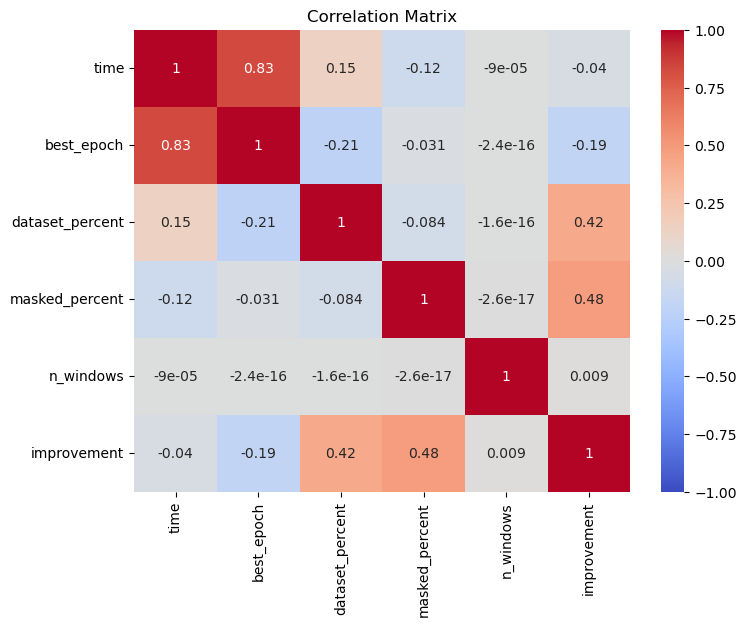

In [32]:
profile_small = ydp.ProfileReport(profile_small_df, title="Pandas Profiling Report for 'df_loss_small'", explorative=True)
plot_correlation(profile_small_df)

Dados los resultados creo que lo que más sentido tiene es hacer la tabla
- 0.25 dataset

In [33]:
results_small["best_epochs"]

0      [0]
1      [0]
2      [0]
3      [0]
4      [0]
      ... 
127    [3]
128    [3]
129    [3]
130    [3]
131    [3]
Name: best_epochs, Length: 132, dtype: object

In [34]:
 #results_small["best_epochs"] = results_small["best_epochs"].apply(lambda x: ast.literal_eval(x))

In [35]:
results_small["best_epochs"][0][0]

'['

In [36]:
all_epochs = [epoch for sublist in results_small["best_epochs"] for epoch in sublist]
print("pre")
print(all_epochs)
all_epochs = [x for x in all_epochs if isinstance(x, int)]
print("post")
print(all_epochs)

pre
['[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', '0', ']', '[', 

/tmp/ipykernel_15646/4160701095.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  epoch_counts = pd.Series(all_epochs).value_counts().sort_index()


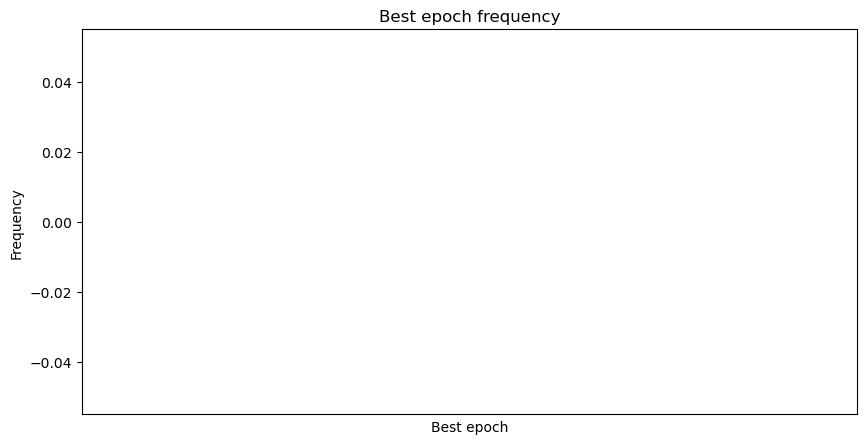

In [37]:

epoch_counts = pd.Series(all_epochs).value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(epoch_counts.index, epoch_counts.values)
plt.xlabel("Best epoch")
plt.ylabel("Frequency")
plt.title("Best epoch frequency")
plt.xticks(epoch_counts.index)  # Asegurar que se muestren todas las épocas en el eje X
plt.show()

## Sklearn feature relevance analysis

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import pandas as pd

def select_k_best_features(df, target_column, k='all'):
    """
    Select the best features using SelectKBest and f_regression.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    k (int or 'all', optional): Number of best features to select (default 'all').
    
    Returns:
    pd.DataFrame: Feature importance scores sorted in descending order.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(X, y)
    
    scores = selector.scores_
    feature_importance = scores / np.sum(scores)  # Normalize scores
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'SelectKBest_Score': scores,
        'SelectKBest_Percentage': feature_importance * 100
    })
    
    return importance_df.sort_values(by='SelectKBest_Percentage', ascending=False)


2️⃣ Obtener la importancia de características con RandomForest

In [39]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_feature_importance(df, target_column):
    """
    Compute feature importance using a RandomForestRegressor.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    
    Returns:
    pd.DataFrame: Feature importance scores sorted in descending order.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    rf_importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'RandomForest_Importance': rf_importances * 100
    })
    
    return importance_df.sort_values(by='RandomForest_Importance', ascending=False)


3️⃣ Análisis combinado de importancia de características

In [40]:
def analyse_feature_importance(df, target_column, k='all'):
    """
    Analyse feature importance using both SelectKBest and RandomForestRegressor.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    k (int or 'all', optional): Number of best features to select (default 'all').
    
    Returns:
    pd.DataFrame: Combined feature importance scores sorted in descending order.
    """
    k_best_df = select_k_best_features(df, target_column, k)
    rf_df = random_forest_feature_importance(df, target_column)
    
    combined_df = pd.merge(k_best_df, rf_df, on='Feature', how='outer')
    return combined_df.sort_values(by='RandomForest_Importance', ascending=False)


In [41]:
results_small["best_epochs"][0][0]

'['

In [42]:
df = profile_small_df[["masked_percent", "n_windows", "dataset_percent", "improvement"]].copy()
df["best_epoch"] = results_small["best_epochs"].apply(lambda x: x[0])
df_feat = df [ df [ "masked_percent" ]  < 1 ]
df_feat = df_feat [ df_feat [ "masked_percent" ]  > 0 ]
df_feat = df_feat [ df_feat [ "dataset_percent" ]  < 1 ]
df_feat[:5]

,masked_percent,n_windows,dataset_percent,improvement,best_epoch
0,0.25,1,0.15,-0.005065,[
1,0.25,2,0.15,0.227339,[
2,0.25,4,0.15,0.227339,[
3,0.25,6,0.15,0.227339,[
4,0.25,8,0.15,0.227339,[


In [43]:
df_feat[pd.isna(df_feat["improvement"])]

,masked_percent,n_windows,dataset_percent,improvement,best_epoch


In [44]:
result = analyse_feature_importance(df_feat, target_column="improvement")
display(result)

ValueError: could not convert string to float: '['

In [ ]:
def count_epoch(df):
    all_epochs = df["best_epoch"]
    print(all_epochs.unique)
    epoch_counts = pd.Series(all_epochs).value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    plt.bar(epoch_counts.index, epoch_counts.values)
    plt.xlabel("Best epoch")
    plt.ylabel("Frequency")
    plt.title("Best epoch frequency")
    plt.xticks(epoch_counts.index)  # Asegurar que se muestren todas las épocas en el eje X
    plt.show()

In [ ]:
count_epoch(df_feat)

# Best option

In [ ]:
def best_combination_for_improvement(df, target_column, importance_df):
    """
    A partir del análisis de importancia (importance_df), selecciona las dos variables 
    más relevantes (según el promedio de SelectKBest_Percentage y RandomForest_Importance). 
    Para cada una, obtiene el valor que da mayor improvement (promedio del target).
    Luego, filtra el DataFrame a esos casos y, en ese subconjunto, para cada variable restante,
    obtiene el valor que maximiza el improvement.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame de entrada.
    target_column : str
        Nombre de la variable objetivo (por ejemplo, "improvement").
    importance_df : pd.DataFrame
        DataFrame resultante de analyse_feature_importance, que debe contener las columnas 
        'Feature', 'SelectKBest_Percentage' y 'RandomForest_Importance'.
    
    Returns:
    --------
    best_values : dict
        Diccionario con para cada variable (tanto las top2 como las restantes) el valor óptimo.
    avg_impr : float or None
        Promedio de improvement en el subconjunto filtrado (puede ser None si no hay casos).
    """
    # Calcular la importancia promedio de cada feature
    importance_df = importance_df.copy()
    importance_df["AvgImportance"] = (importance_df["SelectKBest_Percentage"] + importance_df["RandomForest_Importance"]) / 2
    
    # Ordenar y seleccionar las dos variables más relevantes
    top_features = importance_df.sort_values(by="AvgImportance", ascending=False)["Feature"].tolist()
    top2 = top_features[:2]
    
    best_values = {}
    
    # Para cada una de las dos variables más importantes, obtener el valor que genera mayor improvement.
    for feat in top2:
        # Agrupamos por la variable y calculamos el promedio de improvement para cada valor
        grouped = df.groupby(feat)[target_column].mean().reset_index()
        # Seleccionamos el valor cuyo promedio de improvement es mayor
        best_row = grouped.loc[grouped[target_column].idxmax()]
        best_values[feat] = best_row[feat]
    
    # Filtrar el DataFrame a los casos en que las dos variables toman esos valores
    filtered_df = df.copy()
    for feat, val in best_values.items():
        filtered_df = filtered_df[filtered_df[feat] == val]
    
    # Para el resto de las variables (excluyendo las dos top y el target), buscar el valor que dentro
    # del subconjunto filtrado genere el mayor improvement
    remaining_features = [feat for feat in df.columns if feat not in top2 and feat != target_column]
    for feat in remaining_features:
        grouped = filtered_df.groupby(feat)[target_column].mean().reset_index()
        if len(grouped) > 0:
            best_row = grouped.loc[grouped[target_column].idxmax()]
            best_values[feat] = best_row[feat]
        else:
            best_values[feat] = None  # En caso de no haber datos suficientes
    
    # También se puede obtener el improvement promedio en los casos filtrados por las dos variables top
    if len(filtered_df) > 0:
        avg_impr = filtered_df[target_column].mean()
    else:
        avg_impr = None
    
    return best_values, avg_impr


In [ ]:
feature_importance = analyse_feature_importance(df_feat, target_column="improvement")
display(feature_importance)
best_vals, avg_improvement = best_combination_for_improvement(df_feat, target_column="improvement", importance_df=feature_importance)

print("Mejor combinación de valores:")
for feat, val in best_vals.items():
    print(f"{feat}: {val}")

print(f"\nImprovement promedio en el subconjunto de las top2: {avg_improvement}")


In [ ]:
final = df_feat[ df_feat["n_windows"] == 4].copy()
final = final[ final["dataset_percent"] == 0.25]
final = final[ final ["masked_percent"] == 0.5]
final = final [ final [ "best_epoch" ] == 8]

In [ ]:
final